In [17]:
import qutip as qt 
import numpy as np
import matplotlib.pyplot as plt 
import math 
import os 
from scipy.optimize import fsolve

os.chdir('/Users/ngdnhtien/Codespace/bqec@huikhoon')
%config InlineBackend.figure_formats = ['svg']

In [18]:
exp = np.exp
sqrt = np.sqrt 
cos = np.cos 
sin = np.sin 

def log_factorial(k):
    return math.lgamma(k + 1)

In [76]:
def r(v_db):
    return -np.log(10**(-v_db/10))/2

# Mean modular phase for different encodings

### Cat encoding

In [19]:
def cat1_sum(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = 0.0
    k = 0
    while k <= max_iter:
        log_term = (2 * k + 1) * math.log(alpha) - 0.5 * (log_factorial(k) + log_factorial(k + 1))
        term = math.exp(log_term)
        sum_val += term
        if abs(term) < tolerance:
            break
        k += 1
    
    # Optional tail estimation using Stirling's approximation
    if k < max_iter:
        while k <= max_iter:
            log_term = (2 * k + 1) * math.log(alpha) - 0.5 * (log_factorial(k) + log_factorial(k + 1))
            term = math.exp(log_term)
            sum_val += term
            if abs(term) < tolerance:
                break
            k += 1
    
    return sum_val

def cat1_mmp(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = cat1_sum(alpha, tolerance, max_iter)
    return math.exp(-alpha**2) * sum_val

In [20]:
def cat2_sum(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = 0.0
    k = 0
    while k <= max_iter:
        log_term = (4 * k + 2) * math.log(alpha) - 0.5 * (log_factorial(2*k) + log_factorial(2*k + 2))
        term = math.exp(log_term)
        sum_val += term
        if abs(term) < tolerance:
            break
        k += 1
    
    # Optional tail estimation using Stirling's approximation
    if k < max_iter:
        while k <= max_iter:
            log_term = (4 * k + 2) * math.log(alpha) - 0.5 * (log_factorial(2*k) + log_factorial(2*k + 2))
            term = math.exp(log_term)
            sum_val += term
            if abs(term) < tolerance:
                break
            k += 1
    
    return sum_val

def cat2_mmp(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = cat2_sum(alpha, tolerance, max_iter)
    return (2*math.exp(-alpha**2))/(1+math.exp(-2*alpha**2)) * sum_val

In [21]:
def cat3_sum(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = 0.0
    k = 0
    while k <= max_iter:
        log_term = (6 * k + 3) * math.log(alpha) - 0.5 * (log_factorial(3*k) + log_factorial(3*k + 3))
        term = math.exp(log_term)
        sum_val += term
        if abs(term) < tolerance:
            break
        k += 1
    
    # Optional tail estimation using Stirling's approximation
    if k < max_iter:
        while k <= max_iter:
            log_term = (6 * k + 3) * math.log(alpha) - 0.5 * (log_factorial(3*k) + log_factorial(3*k + 3))
            term = math.exp(log_term)
            sum_val += term
            if abs(term) < tolerance:
                break
            k += 1
    
    return sum_val

def cat3_mmp(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = cat3_sum(alpha, tolerance, max_iter)
    numerator = 3*exp(-alpha**2)
    denominator = 1+2*exp(-3*alpha**2/2)*cos(sqrt(3)*alpha**2/2)
    return (numerator/denominator) * sum_val

In [22]:
def cat4_sum(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = 0.0
    k = 0
    while k <= max_iter:
        log_term = (8 * k + 4) * math.log(alpha) - 0.5 * (log_factorial(4*k) + log_factorial(4*k + 4))
        term = math.exp(log_term)
        sum_val += term
        if abs(term) < tolerance:
            break
        k += 1
    
    # Optional tail estimation using Stirling's approximation
    if k < max_iter:
        while k <= max_iter:
            log_term = (8 * k + 4) * math.log(alpha) - 0.5 * (log_factorial(4*k) + log_factorial(4*k + 4))
            term = math.exp(log_term)
            sum_val += term
            if abs(term) < tolerance:
                break
            k += 1
    
    return sum_val

def cat4_mmp(alpha, tolerance=1e-10, max_iter=1000):
    sum_val = cat4_sum(alpha, tolerance, max_iter)
    numerator = 4*math.exp(-alpha**2)
    denominator = 1+math.exp(-2*alpha**2)+2*math.exp(-alpha**2)*math.cos(alpha**2)
    return (numerator/denominator) * sum_val

### Binomial encoding

In [23]:
import scipy.special as ss

def bin_mmp(K):
    """
    Within one degree of rotation symmetry, the MMP of binomial
    encoding is determined by only the Fock space truncation parameter K
    """

    bin_mmp_val = 0
    for k in range(K):
        bin_mmp_val += ((K-k)/(k+1))**(1/2) * ss.binom(K, k)

    return bin_mmp_val/2**K

### Pegg-Barnett encoding

In [24]:
def pb_mmp(s, N):
    """ 
    The Pegg-Barnett MMP is deteremined by both the degree of rotation symmetry
    and the Fock trumcation parameter s. s-1 must be at least N.
    """
    if s - 1 < N:
        return 'Invalid truncation'
    else:
        return 1-1/(np.ceil(s/N))

### Lazy encoding

In [25]:
def lazy_mmp(b):
    """
    The Lazy encoding only competes within the order-1 division
    """
    return 1/b

# Average photon number for each encoding

### Cat & lazy encoding

In [87]:
def cat1_n(alpha):
    return alpha**2

def cat2_n(alpha):
    return alpha**2 * (1 - np.exp(-2 * alpha**2)) / (1 + np.exp(-2*alpha**2))

def cat3_n(alpha):
    return alpha**2*(1-2*np.exp(-alpha**2/2)*np.sin(np.sqrt(3)*alpha**2/2+np.pi/6))/(1+2*np.exp(-3*alpha**2/2)*np.cos(np.sqrt(3)*alpha**2/2))

def cat4_n(alpha):
    return alpha**2*(1-2*np.sin(alpha**2)*np.exp(-alpha**2)-np.exp(-2*alpha**2))/(1+2*np.cos(alpha**2)*np.exp(-alpha**2)+np.exp(-2*alpha**2))

def lazy_n(b):
    if b <= 1:
        print(r'|b| must be strictly larger than 1')
        return 
    return 1/(b**2-1)

def squeezed_cat1_n(alpha, r, phi):
    theta = 2 * phi
    return np.real(np.abs(alpha)**2 * np.cosh(r)**2 + (1 + np.abs(alpha)**2) * np.sinh(r)**2 \
                - (alpha**2 * np.exp(-1j*theta) + np.conj(alpha)**2 * np.exp(1j*theta)) * np.cosh(r) * np.sinh(r))

### Binomial encoding

In [89]:
def bin_n(N, K):
    return 0.5*N*K

### Pegg-Barnett encoding

In [90]:
def pb_n(s, N):
    return (N/2)*(np.ceil(s/N)-1)

# Embedded phase uncertainty

In [91]:
def epu(mmp):
    return 1/mmp**2 - 1

# Inverse function

In [92]:
from scipy.optimize import fsolve

### Cat and lazy encoding

In [94]:
def inverse_alpha(target_n, code, initial_guess=1.0):
    def equation(alpha):
        if code == 'squeezed_cat1_3':
            return squeezed_cat1_n(alpha, r(3), np.pi/2) - target_n 
        if code == 'squeezed_cat1_67':
            return squeezed_cat1_n(alpha, r(6.7), np.pi/2) - target_n
        if code == 'squeezed_cat1_76':
            return squeezed_cat1_n(alpha, r(7.6), np.pi/2) - target_n
        if code == 'cat1':
            return cat1_n(alpha) - target_n
        if code == 'cat2':
            return cat2_n(alpha) - target_n
        if code == 'cat3':
            return cat3_n(alpha) - target_n 
        if code == 'cat4':
            return cat4_n(alpha) - target_n
    alpha, = fsolve(equation, initial_guess)
    return alpha

def inverse_b(target_n):
    return np.sqrt((1/target_n)+1)

### Binomial

In [95]:
def inverse_K(n, N):
    """ 
        Finding the binomial Fock space truncation parameter for a given degree of rotation symmetry N + photon number n
    """
    return 2*n/N 

### Pegg-Barnett

In [96]:
def inverse_s(target_n, N):
    if N == 1:
        return 2*target_n + 1
    if N == 2:
        return 2*target_n + 2
    if N == 3:
        return 2*target_n + 3
    if N == 4:
        return 2*target_n + 4

# Division $M=1$

In [97]:
avg_n_continuous = np.arange(1, 40, 0.01)
avg_n_discrete = np.arange(1, 40+1, 1)

alpha_squeezed_cat1_3 = [inverse_alpha(n, 'squeezed_cat1_3') for n in avg_n_continuous]
alpha_squeezed_cat1_67 = [inverse_alpha(n, 'squeezed_cat1_67') for n in avg_n_continuous]
alpha_squeezed_cat1_76 = [inverse_alpha(n, 'squeezed_cat1_76') for n in avg_n_continuous]
alpha_cat1 = [inverse_alpha(n, 'cat1') for n in avg_n_continuous]
b_lazy = [inverse_b(n) for n in avg_n_continuous]
K_bin1 = [inverse_K(n, 1) for n in avg_n_discrete]
s_pb1 = [inverse_s(n, 1) for n in avg_n_discrete]

mmp_cat1 = [cat1_mmp(a) for a in alpha_cat1]
mmp_lazy = [lazy_mmp(b) for b in b_lazy]
mmp_bin1 = [bin_mmp(int(K)) for K in K_bin1]
mmp_pb1 = [pb_mmp(s, 1) for s in s_pb1]

epu_cat1 = [epu(mmp) for mmp in mmp_cat1]
epu_lazy = [epu(mmp) for mmp in mmp_lazy]
epu_bin1 = [epu(mmp) for mmp in mmp_bin1]
epu_pb1 = [epu(mmp) for mmp in mmp_pb1]

In [109]:
dim_Fock = 150
a_op = qt.destroy(dim_Fock)
ad_op = qt.create(dim_Fock)
vacuum = qt.basis(dim_Fock, 0)

def squeeze_operator(r, phi):
    xi = r * np.exp(2*1j*phi)
    h = 0.5 * (np.conj(xi) * a_op**2 - xi * ad_op**2)
    return h.expm()

def displacement_operator(alpha):
    h = alpha * ad_op - np.conj(alpha) * a_op
    return h.expm()

def sc1(alpha, r, phi):
    return squeeze_operator(r, phi) * displacement_operator(alpha) * vacuum

In [122]:
squeezed_cat1_3_state = []

for alpha in alpha_squeezed_cat1_3[::30]:
    squeezed_cat1_3_state.append(sc1(alpha, r(3), np.pi/2))

squeezed_cat1_67_state = []

for alpha in alpha_squeezed_cat1_67[::30]:
    squeezed_cat1_67_state.append(sc1(alpha, r(6.7), np.pi/2))

squeezed_cat1_76_state = []

for alpha in alpha_squeezed_cat1_76[::30]:
    squeezed_cat1_76_state.append(sc1(alpha, r(7.6), np.pi/2))

In [142]:
mmp_sc1_3 = []

for sc_state in squeezed_cat1_3_state:
    mmp = 0
    for n in range(len(sc_state.full())-1):
        mmp += np.abs(sc_state.full()[n][0]*sc_state.full()[n+1][0])
    mmp_sc1_3.append(mmp)

mmp_sc1_67 = []

for sc_state in squeezed_cat1_67_state:
    mmp = 0
    for n in range(len(sc_state.full())-1):
        mmp += np.abs(sc_state.full()[n][0]*sc_state.full()[n+1][0])
    mmp_sc1_67.append(mmp)

mmp_sc1_76 = []

for sc_state in squeezed_cat1_76_state:
    mmp = 0
    for n in range(len(sc_state.full())-1):
        mmp += np.abs(sc_state.full()[n][0]*sc_state.full()[n+1][0])
    mmp_sc1_76.append(mmp)

In [151]:
epu_sc1_3 = [epu(mmp) for mmp in mmp_sc1_3]
epu_sc1_67 = [epu(mmp) for mmp in mmp_sc1_67]
epu_sc1_76 = [epu(mmp) for mmp in mmp_sc1_76]

#### Investigating squeezed coherent state

In [154]:
avg_n_sc = avg_n_continuous[::30]

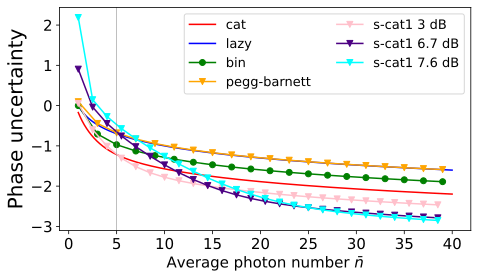

In [165]:
fig, ax = plt.subplots(ncols=1, figsize=(4*1.69, 4))
ax.plot(avg_n_continuous, np.log10(epu_cat1),label='cat', color='red')
ax.plot(avg_n_continuous, np.log10(epu_lazy),label='lazy', color='blue')
ax.plot(avg_n_discrete[::2], np.log10(epu_bin1[::2]), '-o', label='bin', color='green')
ax.plot(avg_n_discrete[::2], np.log10(epu_pb1[::2]), '-v', label='pegg-barnett', color='orange')
ax.plot(avg_n_sc[::5], np.log10(epu_sc1_3[::5]), '-v', label='s-cat1 3 dB', color='pink')
ax.plot(avg_n_sc[::5], np.log10(epu_sc1_67[::5]), '-v', label='s-cat1 6.7 dB', color='indigo')
ax.plot(avg_n_sc[::5], np.log10(epu_sc1_76[::5]), '-v', label='s-cat1 7.6 dB', color='cyan')
ax.legend(fontsize=13, ncol=2)
ax.tick_params(axis='both', which='major',labelsize=15)
ax.set_xlabel(r'Average photon number $\bar{n}$', fontsize=15)
ax.set_ylabel(r'Phase uncertainty', fontsize=20)
ax.axvline(5, linewidth=0.5, color='gray')
fig.tight_layout()
fig.savefig('./gallery/divison1.png',dpi=600)

# Division $M=2$

In [21]:
avg_n_continuous = np.arange(1, 40, 0.01)
avg_n_discrete = np.arange(1, 40+1, 1)

alpha_cat2 = [inverse_alpha(n, 'cat2') for n in avg_n_continuous]
b_lazy = [inverse_b(n) for n in avg_n_continuous]
K_bin2 = [inverse_K(n, 2) for n in avg_n_discrete]
s_pb2 = [inverse_s(n, 2) for n in avg_n_discrete]

mmp_cat2 = [cat2_mmp(a) for a in alpha_cat2]
mmp_lazy = [lazy_mmp(b) for b in b_lazy]
mmp_bin2 = [bin_mmp(int(K)) for K in K_bin2]
mmp_pb2 = [pb_mmp(s, 2) for s in s_pb2]

epu_cat2 = [epu(mmp) for mmp in mmp_cat2]
epu_lazy = [epu(mmp) for mmp in mmp_lazy]
epu_bin2 = [epu(mmp) for mmp in mmp_bin2]
epu_pb2 = [epu(mmp) for mmp in mmp_pb2]

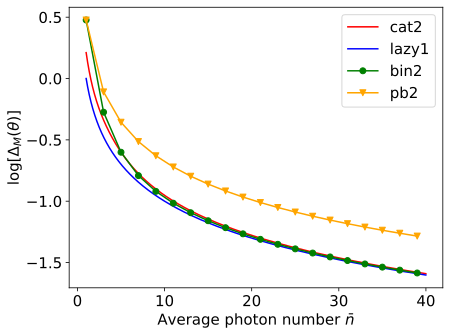

In [22]:
fig, ax = plt.subplots(ncols=1)
ax.plot(avg_n_continuous, np.log10(epu_cat2),label='cat2', color='red')
ax.plot(avg_n_continuous, np.log10(epu_lazy),label='lazy1', color='blue')
ax.plot(avg_n_discrete[::2], np.log10(epu_bin2[::2]), '-o', label='bin2', color='green')
ax.plot(avg_n_discrete[::2], np.log10(epu_pb2[::2]), '-v', label='pb2', color='orange')
ax.legend(fontsize=15)
ax.tick_params(axis='both', which='major',labelsize=15)
ax.set_xlabel(r'Average photon number $\bar{n}$', fontsize=15)
ax.set_ylabel(r'$\log[\Delta_M(\theta)]$', fontsize=15)
fig.tight_layout()
fig.savefig('./gallery/divison2.png',dpi=600)

# Division 3

In [23]:
avg_n_continuous = np.arange(1, 40, 0.01)
avg_n_discrete = np.arange(2, 40+1, 1)

alpha_cat3 = [inverse_alpha(n, 'cat3') for n in avg_n_continuous]
b_lazy = [inverse_b(n) for n in avg_n_continuous]
K_bin3 = [inverse_K(n, 3) for n in avg_n_discrete]
s_pb3 = [inverse_s(n, 3) for n in avg_n_discrete]

mmp_cat3 = [cat3_mmp(a) for a in alpha_cat3]
mmp_lazy = [lazy_mmp(b) for b in b_lazy]
mmp_bin3 = [bin_mmp(int(K)) for K in K_bin3]
mmp_pb3 = [pb_mmp(s, 3) for s in s_pb3]

epu_cat3 = [epu(mmp) for mmp in mmp_cat3]
epu_lazy = [epu(mmp) for mmp in mmp_lazy]
epu_bin3 = [epu(mmp) for mmp in mmp_bin3]
epu_pb3 = [epu(mmp) for mmp in mmp_pb3]

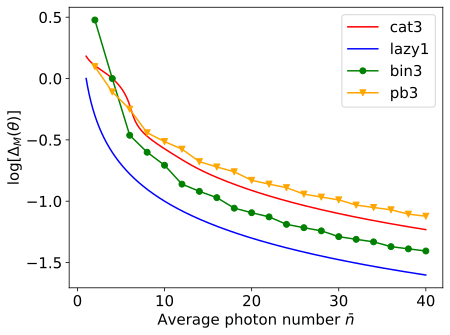

In [24]:
fig, ax = plt.subplots(ncols=1)
ax.plot(avg_n_continuous, np.log10(epu_cat3),label='cat3', color='red')
ax.plot(avg_n_continuous, np.log10(epu_lazy),label='lazy1', color='blue')
ax.plot(avg_n_discrete[::2], np.log10(epu_bin3[::2]), '-o', label='bin3', color='green')
ax.plot(avg_n_discrete[::2], np.log10(epu_pb3[::2]), '-v', label='pb3', color='orange')
ax.legend(fontsize=15)
ax.tick_params(axis='both', which='major',labelsize=15)
ax.set_xlabel(r'Average photon number $\bar{n}$', fontsize=15)
ax.set_ylabel(r'$\log[\Delta_M(\theta)]$', fontsize=15)
fig.tight_layout()
fig.savefig('./gallery/divison3.png',dpi=600)

# Division 4

In [25]:
avg_n_continuous = np.arange(1, 40, 0.01)
avg_n_discrete = np.arange(2, 40+1, 1)

alpha_cat4 = [inverse_alpha(n, 'cat4') for n in avg_n_continuous]
b_lazy = [inverse_b(n) for n in avg_n_continuous]
K_bin4 = [inverse_K(n, 4) for n in avg_n_discrete]
s_pb4 = [inverse_s(n, 4) for n in avg_n_discrete]

mmp_cat4 = [cat4_mmp(a) for a in alpha_cat4]
mmp_lazy = [lazy_mmp(b) for b in b_lazy]
mmp_bin4 = [bin_mmp(int(K)) for K in K_bin4]
mmp_pb4 = [pb_mmp(s_val, 4) for s_val in s_pb4]

epu_cat4 = [epu(mmp) for mmp in mmp_cat4]
epu_lazy = [epu(mmp) for mmp in mmp_lazy]
epu_bin4 = [epu(mmp) for mmp in mmp_bin4]
epu_pb4 = [epu(mmp) for mmp in mmp_pb4]

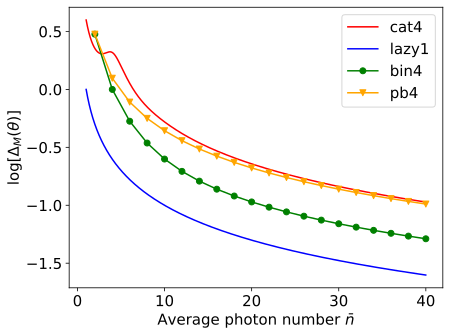

In [26]:
fig, ax = plt.subplots(ncols=1)
ax.plot(avg_n_continuous, np.log10(epu_cat4),label='cat4', color='red')
ax.plot(avg_n_continuous, np.log10(epu_lazy),label='lazy1', color='blue')
ax.plot(avg_n_discrete[::2], np.log10(epu_bin4[::2]), '-o', label='bin4', color='green')
ax.plot(avg_n_discrete[::2], np.log10(epu_pb4[::2]), '-v', label='pegg-b4', color='orange')
ax.legend(fontsize=15)
ax.tick_params(axis='both', which='major',labelsize=15)
ax.set_xlabel(r'Average photon number $\bar{n}$', fontsize=15)
ax.set_ylabel(r'$\log[\Delta_M(\theta)]$', fontsize=15)
fig.tight_layout()
fig.savefig('./gallery/divison4.png',dpi=600)